In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [173]:
LBG_Step_Up_Dataset = pd.read_csv(r'C:\\Users\\DEll\\Downloads\\LBG_Step_Up_Dataset.csv')

In [174]:
LBG_Step_Up_Dataset.head(5)

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [175]:
LBG_Step_Up_Dataset.describe()

,id,annual_inc,installment,loan_amnt,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
count,1.832400e+04,1.832400e+04,18324.000000,18324.000000,17758.000000,9395.000000,9395.000000,17192.000000,17760.000000,17760.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,18324.000000,17714.000000,18324.000000,18324.000000,1.792600e+04
mean,6.832645e+07,8.017611e+04,467.543006,15522.661537,13466.600011,2.301863,5728.533475,125.348127,180.750788,13.077534,...,7.964752,8.575619,8.268525,0.086092,2.274775,11.629284,45.489228,0.142054,24.750109,5.148915e+04
std,4.245703e+07,6.487345e+04,278.099801,9349.294243,16550.730832,2.523087,5628.027589,52.996782,95.122321,16.500588,...,4.847990,7.372691,4.627181,0.440718,1.936068,5.578496,35.907408,0.388198,12.192517,4.970348e+04
min,3.009180e+05,3.000000e+03,30.650000,1000.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,3.491424e+07,4.700000e+04,259.302500,8000.000000,3129.000000,1.000000,2170.500000,97.000000,116.000000,4.000000,...,4.000000,3.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,16.000000,2.151850e+04
50%,6.838023e+07,6.500000e+04,397.480000,14000.000000,7137.000000,2.000000,4244.000000,129.000000,164.000000,8.000000,...,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,3.897700e+04
75%,9.730784e+07,9.500000e+04,635.720000,21000.000000,18436.500000,3.000000,7357.000000,152.000000,231.000000,16.000000,...,10.000000,11.000000,11.000000,0.000000,3.000000,14.000000,75.000000,0.000000,32.000000,6.526700e+04
max,1.708249e+08,2.616000e+06,1503.890000,40000.000000,341236.000000,28.000000,99609.000000,530.000000,674.000000,182.000000,...,45.000000,78.000000,49.000000,10.000000,22.000000,50.000000,100.000000,6.000000,110.000000,1.501187e+06


In [176]:
LBG_Step_Up_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  object 
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  object 
 10  int_rate                18324 non-null  object 
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

In [177]:
LBG_Step_Up_Dataset['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

In [178]:
numeric_columns = LBG_Step_Up_Dataset.select_dtypes(include=[float, int])

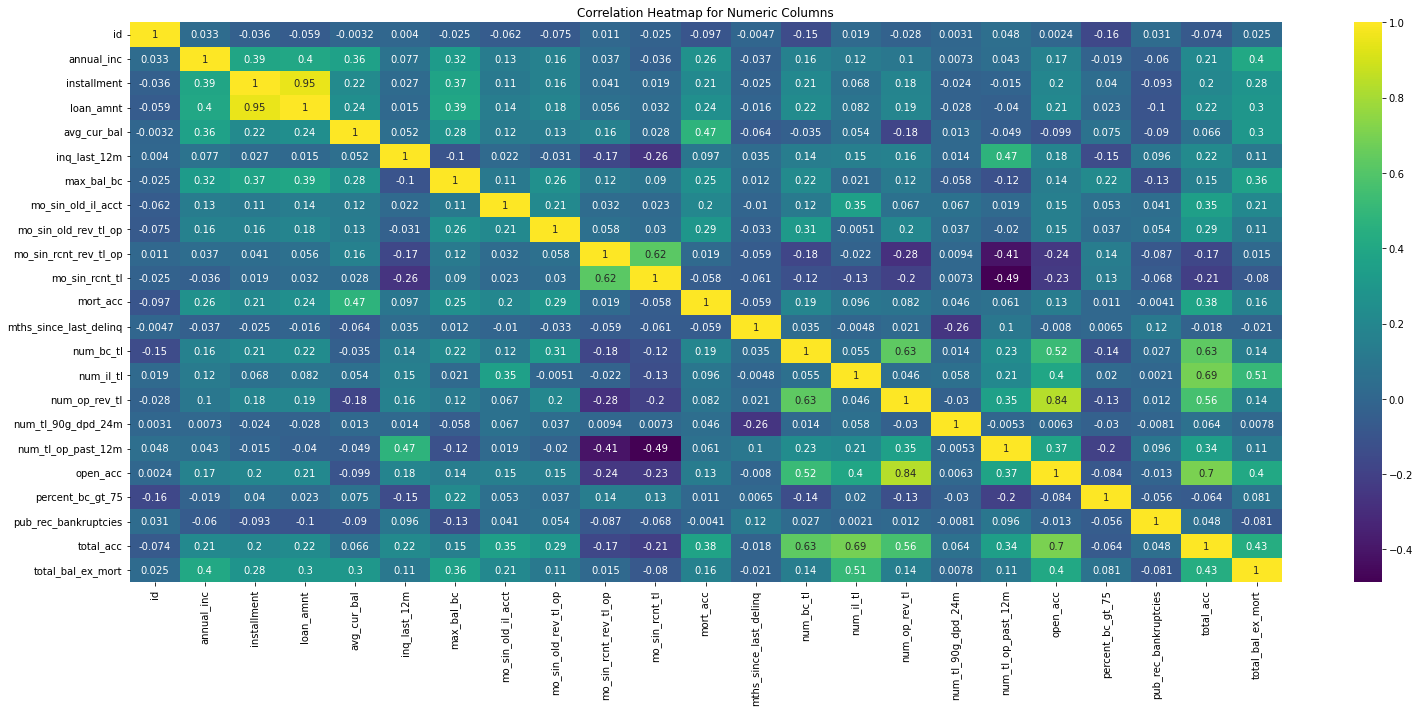

In [179]:
plt.figure(figsize=(22, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Numeric Columns')
plt.tight_layout()

We noticed almost perfect correlation between "loan_amnt" the "installment" feature. We'll explore this features further. Print out their descriptions and perform a scatterplot between them.

Does this relationship make sense to you?
Do we think there is duplicate information here?

Installment = The monthly payment owed by the borrower if the loan originates.
Loan Amount = The listed amount of the loan applied for by the borrower.

In [180]:
installment = LBG_Step_Up_Dataset.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = LBG_Step_Up_Dataset.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [181]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(LBG_Step_Up_Dataset, x='loan_status', y='loan_amnt', points='outliers')
fig.update_layout(
        title='loan_status, loan_amnt box plot', 
        xaxis={
            "showgrid": True, 
            "rangeslider": {
                "visible": True, 
                "thickness": 0.05
            }
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show(renderer="iframe")

In [182]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(LBG_Step_Up_Dataset, x='loan_status', y='installment', points='outliers')
fig.update_layout(
        title='loan_status, installment box plot', 
        xaxis={
            "showgrid": True, 
            "rangeslider": {
                "visible": True, 
                "thickness": 0.05
            }
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show(renderer="iframe")

In [183]:
LBG_Step_Up_Dataset.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3906.0,16482.750896,9156.733313,1000.0,10000.0,15000.0,22537.5,40000.0
Fully Paid,14418.0,15262.562422,9384.199300,1000.0,8000.0,13000.0,20950.0,40000.0


In [184]:
LBG_Step_Up_Dataset['home_ownership'].value_counts()

home_ownership
MORTGAGE    8880
RENT        7382
OWN         2048
ANY           13
OTHER          1
Name: count, dtype: int64

In [185]:
fully_paid = LBG_Step_Up_Dataset.loc[LBG_Step_Up_Dataset['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = LBG_Step_Up_Dataset.loc[LBG_Step_Up_Dataset['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership_count

:Overlay
   .Bars.Count.I  :Bars   [home_ownership]   (count)
   .Bars.Count.II :Bars   [home_ownership]   (count)

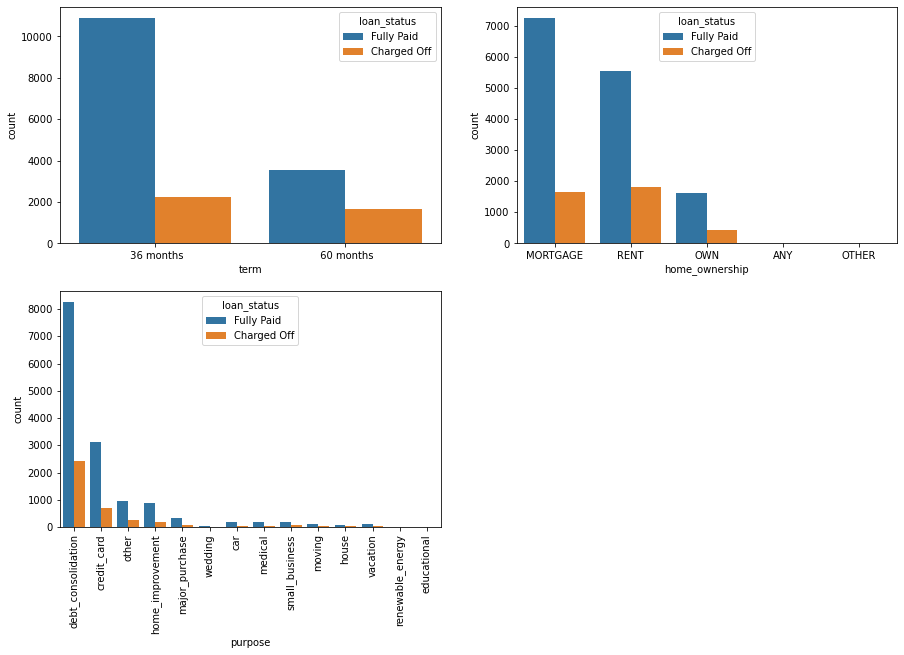

In [186]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=LBG_Step_Up_Dataset, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=LBG_Step_Up_Dataset, hue='loan_status')

plt.subplot(4, 2, 3)
g = sns.countplot(x='purpose', data=LBG_Step_Up_Dataset, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [187]:
LBG_Step_Up_Dataset[LBG_Step_Up_Dataset.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [188]:
print((LBG_Step_Up_Dataset[LBG_Step_Up_Dataset.annual_inc >= 250000].shape[0] / LBG_Step_Up_Dataset.shape[0]) * 100)
print((LBG_Step_Up_Dataset[LBG_Step_Up_Dataset.annual_inc >= 1000000].shape[0] / LBG_Step_Up_Dataset.shape[0]) * 100)

1.8118314778432656
0.038201266099105


In [189]:
LBG_Step_Up_Dataset.loc[LBG_Step_Up_Dataset.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     5
Charged Off    2
Name: count, dtype: int64

In [190]:
LBG_Step_Up_Dataset.loc[LBG_Step_Up_Dataset.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     282
Charged Off     50
Name: count, dtype: int64

In [191]:
print(LBG_Step_Up_Dataset.emp_title.isna().sum())
print(LBG_Step_Up_Dataset.emp_title.nunique())

1282
10040


In [192]:
LBG_Step_Up_Dataset['emp_title'].value_counts()[:20]

emp_title
Teacher               279
Manager               272
Owner                 177
Driver                127
Sales                 122
RN                    119
Registered Nurse      107
Supervisor             91
Project Manager        81
Office Manager         79
Director               78
owner                  69
General Manager        68
Engineer               68
President              67
Vice President         54
teacher                52
manager                51
Accountant             50
Operations Manager     49
Name: count, dtype: int64

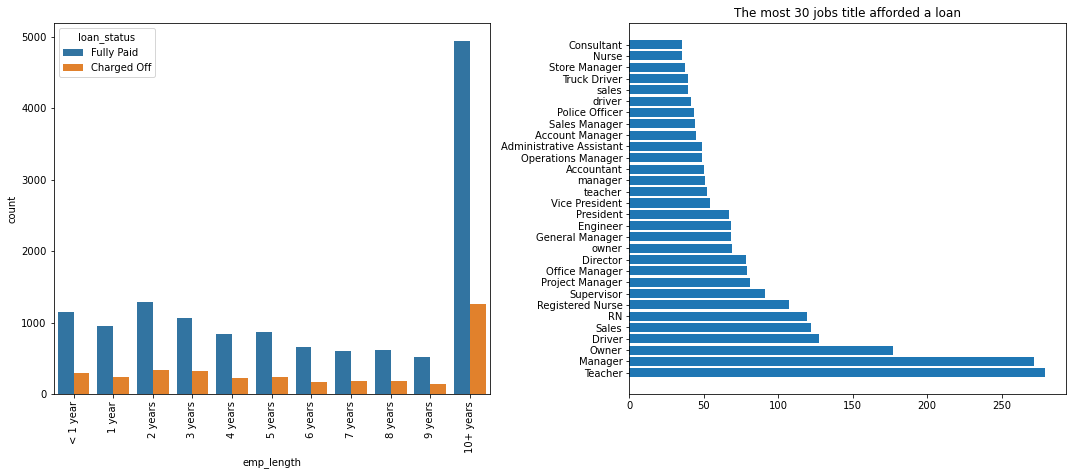

In [193]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=LBG_Step_Up_Dataset, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(LBG_Step_Up_Dataset.emp_title.value_counts()[:30].index, LBG_Step_Up_Dataset.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [194]:
LBG_Step_Up_Dataset.purpose.isna().sum()

0

In [195]:
LBG_Step_Up_Dataset['purpose'] = LBG_Step_Up_Dataset.purpose.str.lower()
LBG_Step_Up_Dataset.purpose.value_counts()[:10]

purpose
debt_consolidation    10678
credit_card            3806
other                  1209
home_improvement       1095
major_purchase          409
small_business          286
medical                 209
car                     199
moving                  144
vacation                137
Name: count, dtype: int64

In [196]:
title="Loan Status by The number of open credit lines"

open_acc = LBG_Step_Up_Dataset.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of bankcards"

num_bc_tl = LBG_Step_Up_Dataset.hvplot.hist(
    y='num_bc_tl', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of bankcards', ylabel='Count', 
    alpha=0.4, legend='top'
)

open_acc + num_bc_tl

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [num_bc_tl]   (num_bc_tl_count)

In [197]:
LBG_Step_Up_Dataset['loan_status'] = LBG_Step_Up_Dataset.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [198]:
columns_to_drop = ['addr_state', 'emp_title', 'home_ownership','emp_length','purpose','term','int_rate']  # Replace with actual column names
LBG_Step_Up_Dataset = LBG_Step_Up_Dataset.drop(columns=columns_to_drop)

In [199]:
LBG_Step_Up_Dataset.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status)

In [200]:
# The length of the data
print(f"The Length of the data: {LBG_Step_Up_Dataset.shape}")

The Length of the data: (18324, 24)


In [201]:
for column in LBG_Step_Up_Dataset.columns:
    if LBG_Step_Up_Dataset[column].isna().sum() != 0:
        missing = LBG_Step_Up_Dataset[column].isna().sum()
        portion = (missing / LBG_Step_Up_Dataset.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'avg_cur_bal': number of missing values '566' ==> '3.089%'
'inq_last_12m': number of missing values '8929' ==> '48.728%'
'max_bal_bc': number of missing values '8929' ==> '48.728%'
'mo_sin_old_il_acct': number of missing values '1132' ==> '6.178%'
'mo_sin_old_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_tl': number of missing values '564' ==> '3.078%'
'mort_acc': number of missing values '398' ==> '2.172%'
'mths_since_last_delinq': number of missing values '9048' ==> '49.378%'
'num_bc_tl': number of missing values '564' ==> '3.078%'
'num_il_tl': number of missing values '564' ==> '3.078%'
'num_op_rev_tl': number of missing values '564' ==> '3.078%'
'num_tl_90g_dpd_24m': number of missing values '564' ==> '3.078%'
'num_tl_op_past_12m': number of missing values '564' ==> '3.078%'
'percent_bc_gt_75': number of missing values '610' ==> '3.329%'
'total_bal_ex_mort': number of missing values '398' ==

In [202]:
LBG_Step_Up_Dataset.mths_since_last_delinq.value_counts()

mths_since_last_delinq
7.0      183
12.0     181
16.0     176
17.0     172
6.0      172
        ... 
115.0      1
97.0       1
102.0      1
94.0       1
104.0      1
Name: count, Length: 98, dtype: int64

In [203]:
LBG_Step_Up_Dataset.mths_since_last_delinq.isna().sum()

9048

In [204]:
LBG_Step_Up_Dataset.corr()['mths_since_last_delinq'].drop('mths_since_last_delinq').sort_values().hvplot.barh()

:Bars   [index]   (mths_since_last_delinq)

In [205]:
LBG_Step_Up_Dataset['mths_since_last_delinq'].fillna(0, inplace=True)

In [206]:
for column in LBG_Step_Up_Dataset.columns:
    if LBG_Step_Up_Dataset[column].isna().sum() != 0:
        missing = LBG_Step_Up_Dataset[column].isna().sum()
        portion = (missing / LBG_Step_Up_Dataset.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'avg_cur_bal': number of missing values '566' ==> '3.089%'
'inq_last_12m': number of missing values '8929' ==> '48.728%'
'max_bal_bc': number of missing values '8929' ==> '48.728%'
'mo_sin_old_il_acct': number of missing values '1132' ==> '6.178%'
'mo_sin_old_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_tl': number of missing values '564' ==> '3.078%'
'mort_acc': number of missing values '398' ==> '2.172%'
'num_bc_tl': number of missing values '564' ==> '3.078%'
'num_il_tl': number of missing values '564' ==> '3.078%'
'num_op_rev_tl': number of missing values '564' ==> '3.078%'
'num_tl_90g_dpd_24m': number of missing values '564' ==> '3.078%'
'num_tl_op_past_12m': number of missing values '564' ==> '3.078%'
'percent_bc_gt_75': number of missing values '610' ==> '3.329%'
'total_bal_ex_mort': number of missing values '398' ==> '2.172%'


In [207]:
columns_to_drop = ['inq_last_12m', 'max_bal_bc']  # Replace with actual column names
LBG_Step_Up_Dataset = LBG_Step_Up_Dataset.drop(columns=columns_to_drop)

In [208]:
for column in LBG_Step_Up_Dataset.columns:
    if LBG_Step_Up_Dataset[column].isna().sum() != 0:
        missing = LBG_Step_Up_Dataset[column].isna().sum()
        portion = (missing / LBG_Step_Up_Dataset.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'avg_cur_bal': number of missing values '566' ==> '3.089%'
'mo_sin_old_il_acct': number of missing values '1132' ==> '6.178%'
'mo_sin_old_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_rev_tl_op': number of missing values '564' ==> '3.078%'
'mo_sin_rcnt_tl': number of missing values '564' ==> '3.078%'
'mort_acc': number of missing values '398' ==> '2.172%'
'num_bc_tl': number of missing values '564' ==> '3.078%'
'num_il_tl': number of missing values '564' ==> '3.078%'
'num_op_rev_tl': number of missing values '564' ==> '3.078%'
'num_tl_90g_dpd_24m': number of missing values '564' ==> '3.078%'
'num_tl_op_past_12m': number of missing values '564' ==> '3.078%'
'percent_bc_gt_75': number of missing values '610' ==> '3.329%'
'total_bal_ex_mort': number of missing values '398' ==> '2.172%'


In [209]:
LBG_Step_Up_Dataset.dropna(inplace=True)

In [210]:
LBG_Step_Up_Dataset.shape

(16983, 22)

In [211]:
LBG_Step_Up_Dataset.head(5)

,id,annual_inc,installment,loan_amnt,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
1,14518910,97500.0,966.47,35000,7019.0,148.0,170.0,28.0,9.0,4.0,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,1
2,54333324,120000.0,806.57,25000,4891.0,128.0,147.0,80.0,11.0,0.0,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,1
3,62247022,130000.0,846.17,25225,17619.0,130.0,172.0,68.0,2.0,4.0,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,1
4,71986114,58296.0,41.79,1200,12321.0,167.0,145.0,18.0,18.0,1.0,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,1
5,46733394,87000.0,629.47,24000,5896.0,354.0,100.0,1.0,1.0,2.0,...,12.0,19.0,0.0,6.0,24,77.8,0,42,50912.0,0


In [212]:
w_p = LBG_Step_Up_Dataset.loan_status.value_counts()[0] / LBG_Step_Up_Dataset.shape[0]
w_n = LBG_Step_Up_Dataset.loan_status.value_counts()[1] / LBG_Step_Up_Dataset.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.21421421421421422
Weight of negative values 0.7857857857857858


In [213]:
train, test = train_test_split(LBG_Step_Up_Dataset, test_size=0.35, random_state=42)

print(train.shape)
print(test.shape)

(11038, 22)
(5945, 22)


In [214]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [215]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [216]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [217]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [218]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [219]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
345/345 [==============================] - 14s 21ms/step - loss: 0.5729 - AUC: 0.5638 - val_loss: 0.5208 - val_AUC: 0.5597
Epoch 2/20
345/345 [==============================] - 6s 19ms/step - loss: 0.5160 - AUC: 0.6129 - val_loss: 0.5146 - val_AUC: 0.6050
Epoch 3/20
345/345 [==============================] - 3s 9ms/step - loss: 0.5077 - AUC: 0.6229 - val_loss: 0.5196 - val_AUC: 0.6135
Epoch 4/20
345/345 [==============================] - 4s 12ms/step - loss: 0.5015 - AUC: 0.6368 - val_loss: 0.5190 - val_AUC: 0.6078
Epoch 5/20
345/345 [==============================] - 4s 10ms/step - loss: 0.4990 - AUC: 0.6440 - val_loss: 0.5164 - val_AUC: 0.6076
Epoch 6/20
345/345 [==============================] - 3s 10ms/step - loss: 0.4973 - AUC: 0.6485 - val_loss: 0.5206 - val_AUC: 0.5858
Epoch 7/20
345/345 [==============================] - 4s 12ms/step - loss: 0.4927 - AUC: 0.6597 - val_loss: 0.5220 - val_AUC: 0.6067
Epoch 8/20
345/345 [==============================] - 4s 10ms/step - 

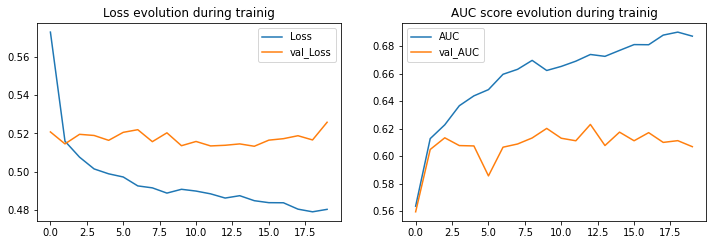

In [220]:
plot_learning_evolution(r)

In [221]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

345/345 [==============================] - 6s 2ms/step
Train Result:
Accuracy Score: 79.98%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy     macro avg  weighted avg
precision     0.703504     0.803131  0.799783      0.753318      0.781821
recall        0.110546     0.987323  0.799783      0.548935      0.799783
f1-score      0.191069     0.885753  0.799783      0.538411      0.737162
support    2361.000000  8677.000000  0.799783  11038.000000  11038.000000
_______________________________________________
Confusion Matrix: 
 [[ 261 2100]
 [ 110 8567]]



In [222]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

186/186 [==============================] - 4s 2ms/step
Test Result:
Accuracy Score: 77.93%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.402235     0.791016   0.77931     0.596625      0.707505
recall        0.056382     0.977078   0.77931     0.516730      0.779310
f1-score      0.098901     0.874257   0.77931     0.486579      0.707709
support    1277.000000  4668.000000   0.77931  5945.000000   5945.000000
_______________________________________________
Confusion Matrix: 
 [[  72 1205]
 [ 107 4561]]



In [223]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

186/186 [==============================] - 2s 2ms/step


In [224]:
!pip install xgboost

In [225]:
from xgboost import XGBClassifier

In [227]:
# Create an instance of XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)

# Fit the classifier to your training data
xgb_clf.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9298786011958688
Test Accuracy: 0.768713204373423


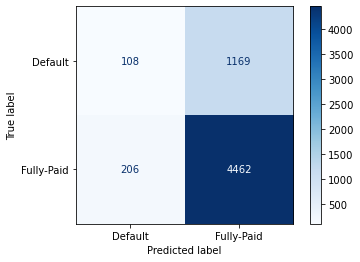

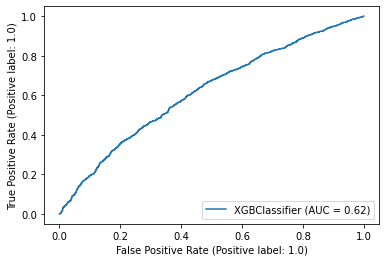

In [228]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [229]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [230]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2361.0  8677.0       1.0    11038.0       11038.0
_______________________________________________
Confusion Matrix: 
 [[2361    0]
 [   0 8677]]

Test Result:
Accuracy Score: 78.37%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.408163     0.786805  0.783684     0.597484      0.705472
recall        0.015662     0.993787  0.783684     0.504725      0.783684
f1-score      0.030166     0.878266  0.783684     0.454216      0.696092
support    1277.000000  4668.000000  0.783684  5945.000000   5945.000000
__________________

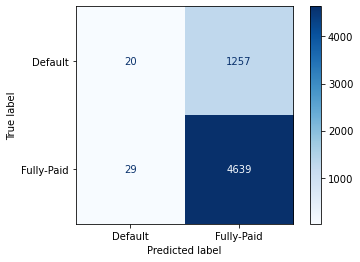

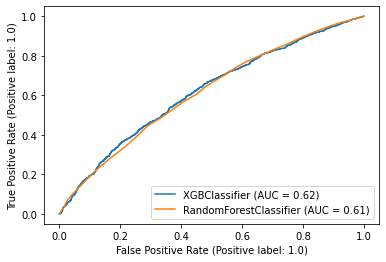

In [231]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [232]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

In [233]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.505
XGBOOST                        roc_auc_score: 0.520
186/186 [==============================] - 2s 2ms/step
ANNS                           roc_auc_score: 0.607


In [234]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)